In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [2]:
df = pd.read_csv('bike_train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [4]:
df.count()

datetime      10886
season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
dtype: int64

Вроде как пропущенных значений нет, однако я галазами пробежался по данным и заметил много нулей в графе со скоростью ветра

In [5]:
df['windspeed'].value_counts()

windspeed
0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: count, dtype: int64

В графе не так много уникальных значений, при много наблюдений с одиновыми значениями, что странно для такого параметра, как скорость ветра, при этом значения дробные, что говорит о том, что беда не в окуруглении, а скорее всего в переводе из одной единицы измерения(с меньшым разбросом встречающихся значений) в другую(с большим), тоже самое касается и погоды, поэтому я склонен считать, что 0 - это отстувие ветра, а не отсутсвие значения

Добавим выходной как парметр

In [6]:
weekend = np.zeros(len(df)) 
df.insert(4,'weekend',weekend)
df.loc[(df['holiday'] == 0) & (df['workingday'] == 0),'weekend'] = 1
df

,datetime,season,holiday,workingday,weekend,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1.0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1.0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1.0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1.0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1.0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,0.0,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,0.0,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,0.0,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,0.0,1,13.94,17.425,61,6.0032,12,117,129


In [7]:
time_ = df['datetime'].apply(lambda x: x.split(' ')[1].split(':')[0])

In [8]:
df.insert(1,'time',time_)

In [9]:
#пока не будем переводить в формат даты, ради дальнейших манипуляций
date_ = df['datetime'].apply(lambda x: x.split(' ')[0])
df.insert(1,'date',date_)

In [10]:
df.drop('datetime', axis = 1,inplace = True)
df

,date,time,season,holiday,workingday,weekend,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,00,1,0,0,1.0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01,01,1,0,0,1.0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01,02,1,0,0,1.0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01,03,1,0,0,1.0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01,04,1,0,0,1.0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19,19,4,0,1,0.0,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19,20,4,0,1,0.0,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19,21,4,0,1,0.0,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19,22,4,0,1,0.0,1,13.94,17.425,61,6.0032,12,117,129


In [11]:
df['time'] = df['time'].apply(lambda x: int(x))
df

,date,time,season,holiday,workingday,weekend,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,0,1,0,0,1.0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01,1,1,0,0,1.0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01,2,1,0,0,1.0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01,3,1,0,0,1.0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01,4,1,0,0,1.0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19,19,4,0,1,0.0,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19,20,4,0,1,0.0,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19,21,4,0,1,0.0,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19,22,4,0,1,0.0,1,13.94,17.425,61,6.0032,12,117,129


In [12]:
df['time'].value_counts()

time
12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: count, dtype: int64

а вот и нашлись пропущенные данные, о которых шла речь. При прогнозировании чисто по переменным это не должно повлиять, а вот если добавлять лаг, то это уже может сыграть роль, так как некоторые данные могут просто не подтянутся, поэтому я удалю данные за весь день, если отсутвует хотя бы 1 час

я передумал, так как данные в любом случаем будут групироватся по часу, то все будет ок,да это вызовет небольшой дисбаланс по часам, но так как это не финальный класс, то это не такая большая проблема, как та, которая может возникнуть при семплинге, так как количество пропущенных дней слишком большое, почти 30% для каждого из двух лет. Либо нужно ресепмлить данные по часам для дня, если там есть условно больше 6 часов, а в противно случае удалять, но это слишком запарно

In [13]:
# df[df['date'] == '2011-01-01']['time'].mean()

In [14]:
# unq_dates = df['date'].unique()
# for date in unq_dates:
#     if df[df['date'] == date]['time'].mean() != 11.5:
#         df.drop(df[df['date'] == date].index,inplace= True)

In [15]:
df['time'].value_counts()

time
12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: count, dtype: int64

теперь все ок

In [16]:
df.reset_index(drop=True,inplace=True)
df

,date,time,season,holiday,workingday,weekend,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,0,1,0,0,1.0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01,1,1,0,0,1.0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01,2,1,0,0,1.0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01,3,1,0,0,1.0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01,4,1,0,0,1.0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19,19,4,0,1,0.0,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19,20,4,0,1,0.0,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19,21,4,0,1,0.0,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19,22,4,0,1,0.0,1,13.94,17.425,61,6.0032,12,117,129


вроде не много удалили => все ок

In [17]:
time_gruped = df.groupby('time').agg({'casual':'mean','registered':'mean'})
time_gruped.index.name = None
time_gruped

,casual,registered
0,10.312088,44.826374
1,6.513216,27.345815
2,4.819196,18.080357
3,2.681293,9.076212
4,1.262443,5.144796
5,1.455752,18.311947
6,4.149451,72.109890
7,10.914286,202.202198
8,21.542857,341.226374
9,30.956044,190.824176


c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


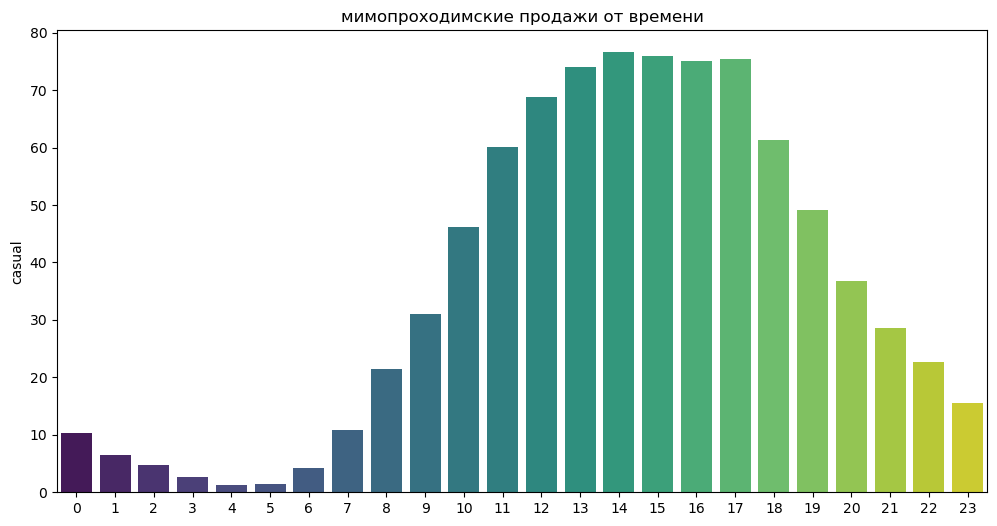

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(data = time_gruped,y = 'casual', x =time_gruped.index , palette='viridis')
plt.title('мимопроходимские продажи от времени')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


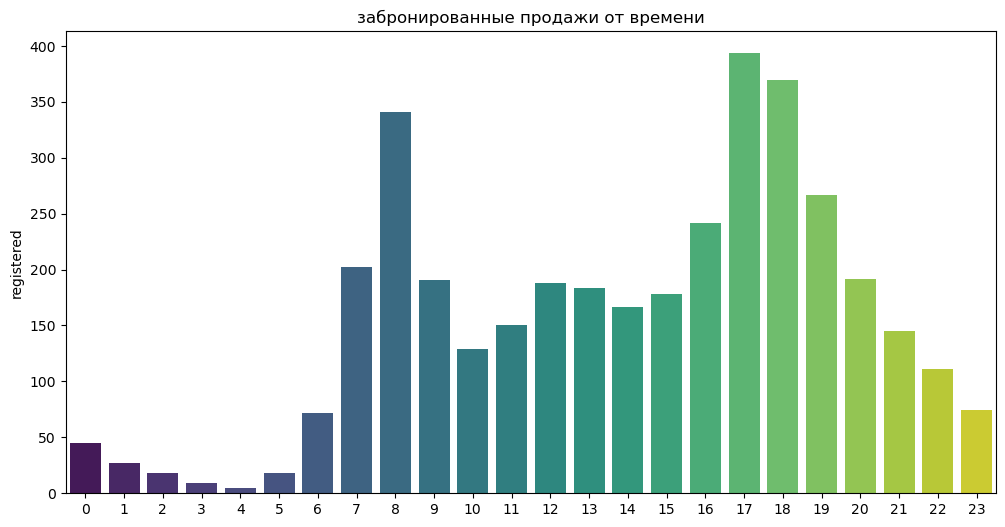

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(data = time_gruped,y = 'registered', x =time_gruped.index , palette='viridis')
plt.title('забронированные продажи от времени')
plt.show()

Видно, что от часа распределенно не равномерно, поэтому добавим час в дф, как признак, вместо утро/день/вечер/ночь, как я хотел изнаально

In [20]:
df['time'] = df['time'].apply(lambda x: str(x)+' hour')
df

,date,time,season,holiday,workingday,weekend,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,0 hour,1,0,0,1.0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01,1 hour,1,0,0,1.0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01,2 hour,1,0,0,1.0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01,3 hour,1,0,0,1.0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01,4 hour,1,0,0,1.0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19,19 hour,4,0,1,0.0,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19,20 hour,4,0,1,0.0,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19,21 hour,4,0,1,0.0,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19,22 hour,4,0,1,0.0,1,13.94,17.425,61,6.0032,12,117,129


In [21]:
month_ = df['date'].apply(lambda x: int(x.split('-')[1]))

In [22]:
df.insert(1,'month',month_)

In [23]:
df

,date,month,time,season,holiday,workingday,weekend,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0 hour,1,0,0,1.0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01,1,1 hour,1,0,0,1.0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01,1,2 hour,1,0,0,1.0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01,1,3 hour,1,0,0,1.0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01,1,4 hour,1,0,0,1.0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19,12,19 hour,4,0,1,0.0,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19,12,20 hour,4,0,1,0.0,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19,12,21 hour,4,0,1,0.0,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19,12,22 hour,4,0,1,0.0,1,13.94,17.425,61,6.0032,12,117,129


In [24]:
month_gruped = df.groupby('month').agg({'casual':'mean','registered':'mean'})
month_gruped.index.name = None
month_gruped

,casual,registered
1,8.203620,82.162896
2,10.318535,99.684795
3,27.809101,120.360710
4,43.798680,140.361936
5,45.268640,174.190789
6,53.260965,188.770833
7,55.862939,179.462719
8,50.296053,183.822368
9,50.496150,183.309131
10,41.807903,185.891328


c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


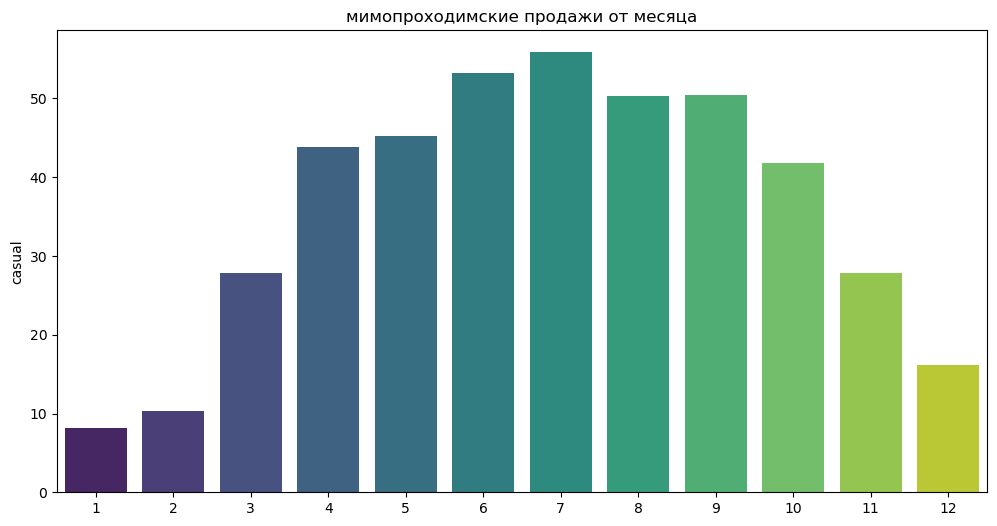

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(data = month_gruped,y = 'casual', x =month_gruped.index , palette='viridis')
plt.title('мимопроходимские продажи от месяца')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


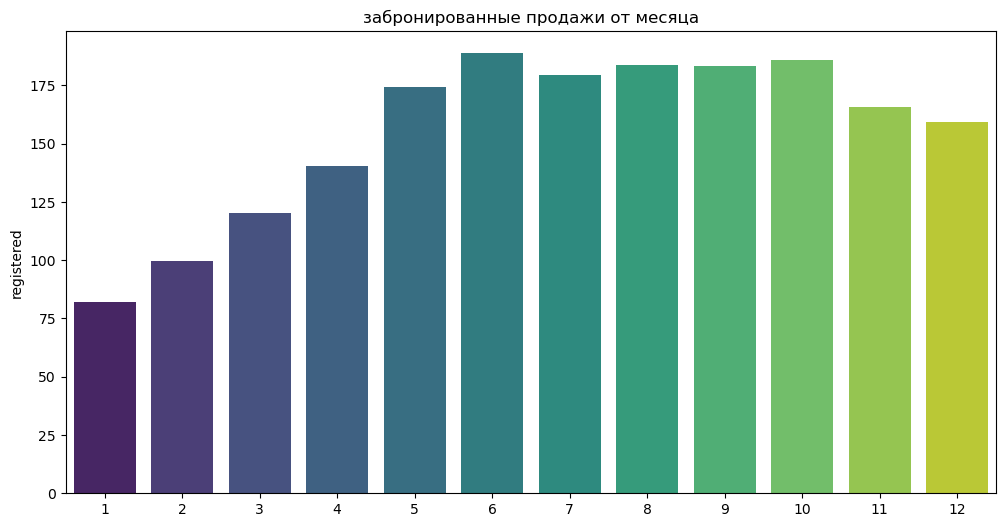

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(data = month_gruped,y = 'registered', x =month_gruped.index , palette='viridis')
plt.title('забронированные продажи от месяца')
plt.show()

In [27]:
tepm_on_month = df.groupby('month').agg({'temp':'mean','atemp':'mean'})
tepm_on_month.index.name = None
tepm_on_month

,temp,atemp
1,9.840000,12.077579
2,11.798535,14.532608
3,15.902175,19.017220
4,18.718372,22.305891
5,22.674079,26.632374
6,27.064496,30.988750
7,30.841711,34.900395
8,29.736689,33.122001
9,25.779032,29.590248
10,20.933853,24.739682


c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


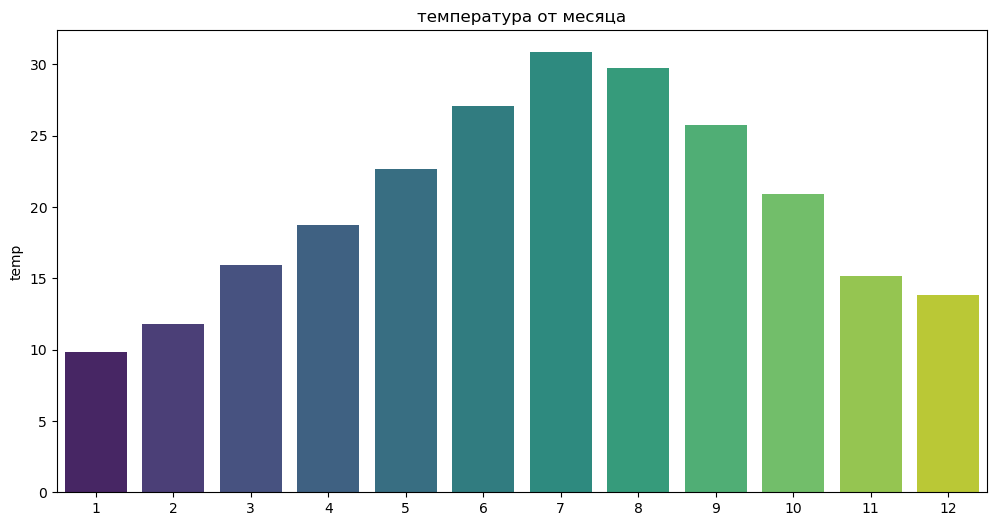

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(data = tepm_on_month,y = 'temp', x =tepm_on_month.index , palette='viridis')
plt.title('температура от месяца')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


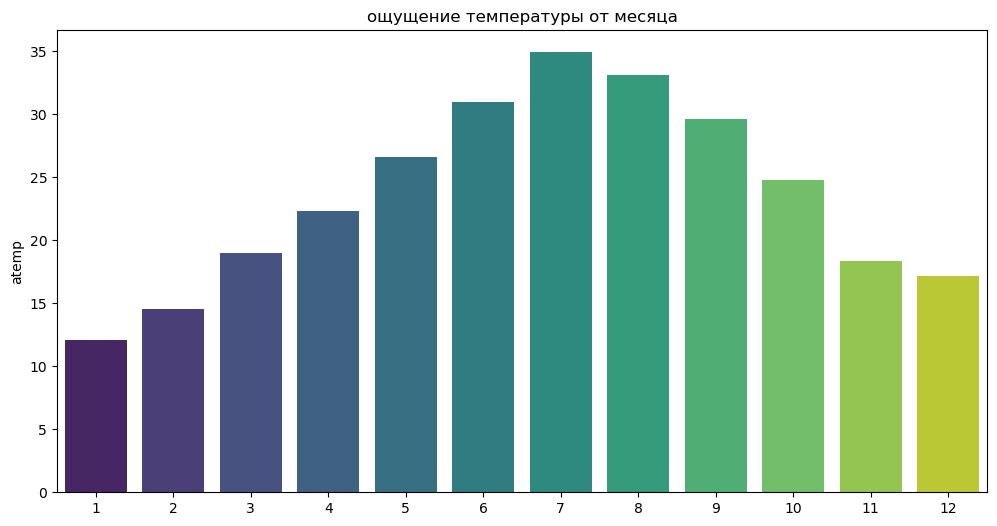

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(data = tepm_on_month,y = 'atemp', x =tepm_on_month.index , palette='viridis')
plt.title('ощущение температуры от месяца')
plt.show()

квартал, который почему-то записан, как время года,я удалю, так как месяц несет ту же информацию, только более точно

In [30]:
df.drop('season', axis = 1,inplace = True)
df

,date,month,time,holiday,workingday,weekend,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0 hour,0,0,1.0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01,1,1 hour,0,0,1.0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01,1,2 hour,0,0,1.0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01,1,3 hour,0,0,1.0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01,1,4 hour,0,0,1.0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19,12,19 hour,0,1,0.0,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19,12,20 hour,0,1,0.0,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19,12,21 hour,0,1,0.0,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19,12,22 hour,0,1,0.0,1,13.94,17.425,61,6.0032,12,117,129


так как продажи нелинейно зависят от месяца и при этом температура тоже зависит от мясаца, чтобы не создавать кучу перменных, я бы удалил месяц, так как зависимость от месяца нелинейнная и следовательно надо было бы делать из него дамми-перменную + чтоб между перменными небыло корреляции.Но забронированные продажи, имеют зависимость от месяца, которая не обьясняется погодой, поэтому я сгрупирую месяца

In [31]:
r_moths = {'1 m':[1],'2m':[2],'3-4m':[3,4],'5-10m':[5,6,7,8,9,10],'11-12m':[11,12]}
def regroup_month(month):
    for key in r_moths:
        if month in r_moths[key]:
            return key

In [32]:
df['month'] = df['month'].apply(lambda x: regroup_month(x))
df

,date,month,time,holiday,workingday,weekend,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1 m,0 hour,0,0,1.0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01,1 m,1 hour,0,0,1.0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01,1 m,2 hour,0,0,1.0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01,1 m,3 hour,0,0,1.0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01,1 m,4 hour,0,0,1.0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19,11-12m,19 hour,0,1,0.0,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19,11-12m,20 hour,0,1,0.0,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19,11-12m,21 hour,0,1,0.0,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19,11-12m,22 hour,0,1,0.0,1,13.94,17.425,61,6.0032,12,117,129


In [33]:
correlation_matrix = df[['casual','registered', "temp",'atemp','humidity','windspeed']].corr()
correlation_matrix

,casual,registered,temp,atemp,humidity,windspeed
casual,1.000000,0.497250,0.467097,0.462067,-0.348187,0.092276
registered,0.497250,1.000000,0.318571,0.314635,-0.265458,0.091052
temp,0.467097,0.318571,1.000000,0.984948,-0.064949,-0.017852
atemp,0.462067,0.314635,0.984948,1.000000,-0.043536,-0.057473
humidity,-0.348187,-0.265458,-0.064949,-0.043536,1.000000,-0.318607
windspeed,0.092276,0.091052,-0.017852,-0.057473,-0.318607,1.000000


фикс матрицы кореляций,чтоб корректно отображалась
conda install -c conda-forge matplotlib=3.7.3 -n new_env 

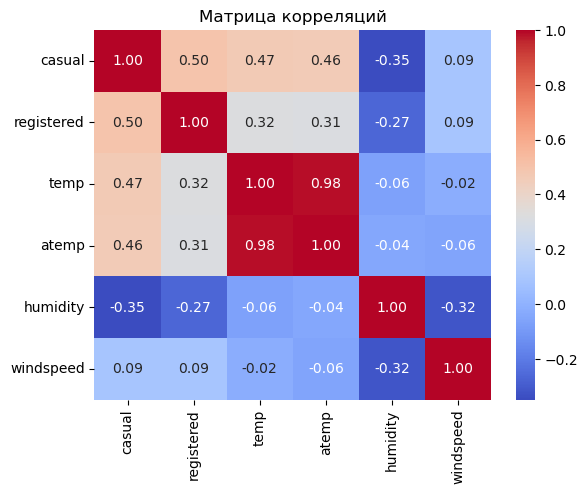

In [34]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

сильная корреляция между реальной и ощущаемой температурой это неприятно, но я посмотрю на результат пока так, потом уберу температуру

In [35]:
date_mean = df.groupby('date').agg({'casual':'mean','registered':'mean'})
date_mean.index.name = None
date_mean 

,casual,registered
2011-01-01,13.791667,27.250000
2011-01-02,5.695652,29.130435
2011-01-03,5.454545,55.863636
2011-01-04,4.695652,63.217391
2011-01-05,3.565217,66.000000
...,...,...
2012-12-15,31.958333,178.333333
2012-12-16,22.416667,135.333333
2012-12-17,8.833333,182.208333
2012-12-18,18.041667,213.500000


c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

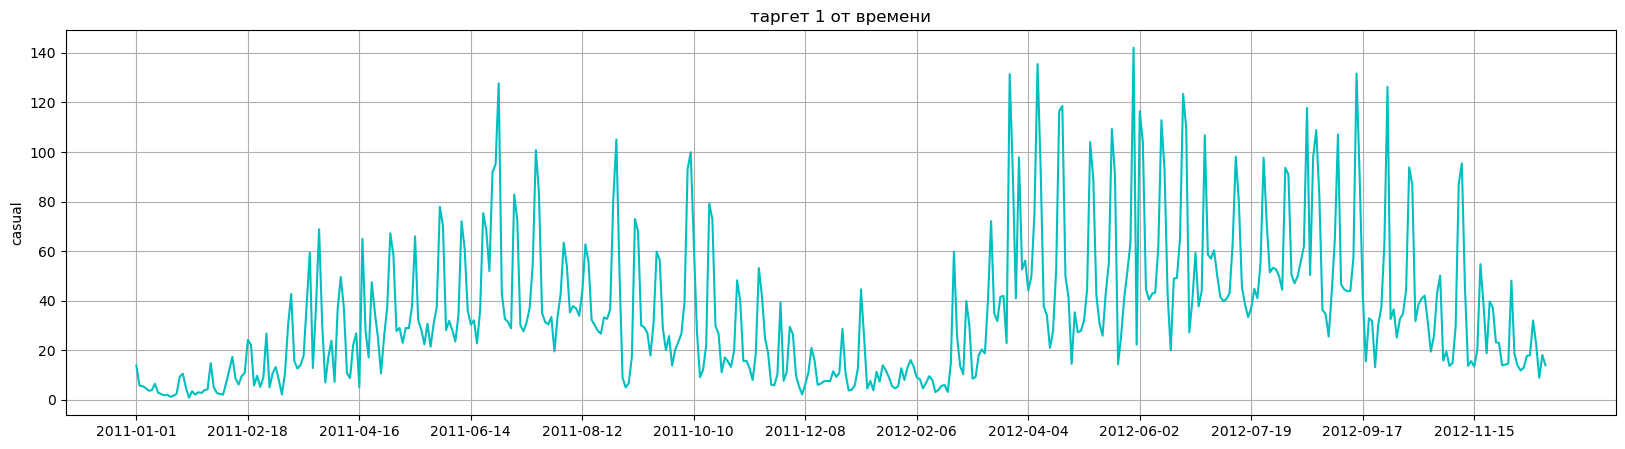

In [36]:
plt.figure(figsize=(20,5))
sns.lineplot(data = date_mean, y = 'casual', x = date_mean.index, color = 'c')
plt.title('таргет 1 от времени')
plt.xticks(np.arange(0,len(date_mean),36))
plt.grid(True)
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

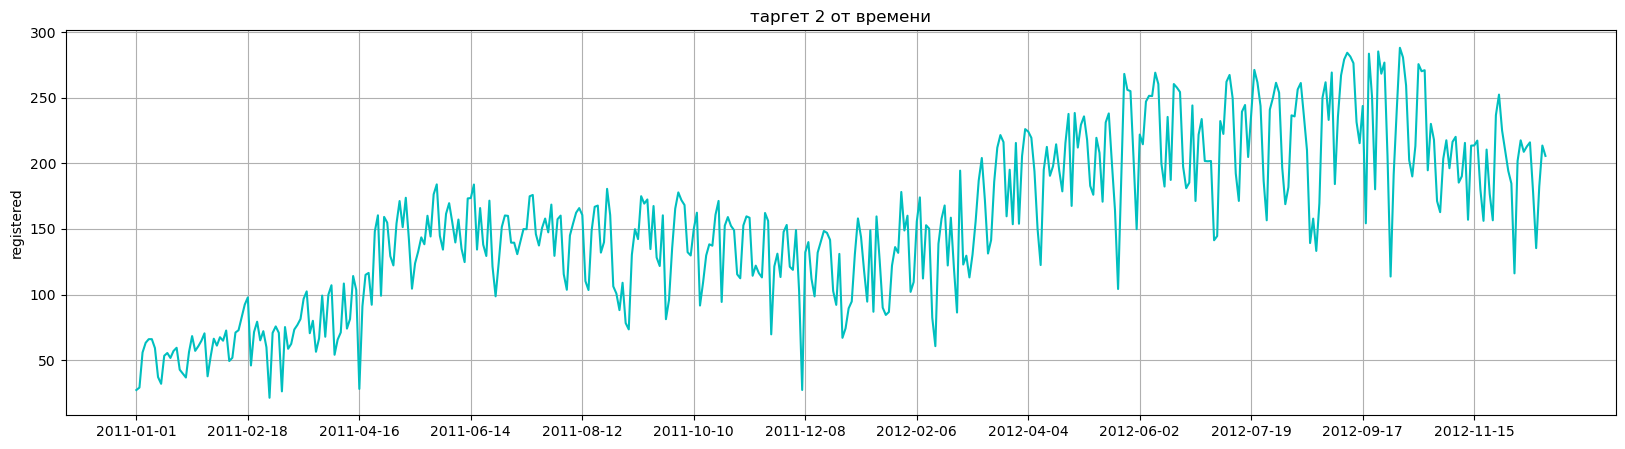

In [37]:
plt.figure(figsize=(20,5))
sns.lineplot(data = date_mean, y = 'registered', x = date_mean.index, color= 'c')
plt.title('таргет 2 от времени')
plt.xticks(np.arange(0,len(date_mean),36))
plt.grid(True)
plt.show()

Данные в среднем прирастают во второй наблюдаемый год, так что разбивать с учетом времени имеет смысл. Так же надо либо даваить бинарную переменную года, либо переделать месяцы, либо, что должно быть более эффективным, добавить предыдущие наблюдения

In [38]:
df['weather'] = df['weather'].apply(lambda x: 'weather type '+str(x))
df

,date,month,time,holiday,workingday,weekend,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1 m,0 hour,0,0,1.0,weather type 1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01,1 m,1 hour,0,0,1.0,weather type 1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01,1 m,2 hour,0,0,1.0,weather type 1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01,1 m,3 hour,0,0,1.0,weather type 1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01,1 m,4 hour,0,0,1.0,weather type 1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19,11-12m,19 hour,0,1,0.0,weather type 1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19,11-12m,20 hour,0,1,0.0,weather type 1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19,11-12m,21 hour,0,1,0.0,weather type 1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19,11-12m,22 hour,0,1,0.0,weather type 1,13.94,17.425,61,6.0032,12,117,129


In [39]:
df['date'] = pd.to_datetime(df['date'])
df['weekend'] = df['weekend'].astype('int64')
df.dtypes

date          datetime64[ns]
month                 object
time                  object
holiday                int64
workingday             int64
weekend                int64
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [40]:
df['date'].apply(lambda x: x.year).value_counts()/24

date
2012    227.666667
2011    225.916667
Name: count, dtype: float64

In [41]:
df["date"].min(), df["date"].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 00:00:00'))

In [42]:
days_count = (df["date"].max() - df["date"].min())

In [43]:
(227+225)*0.25

113.0

In [44]:
split_point = df["date"].max() - pd.Timedelta(days=113)
split_point

Timestamp('2012-08-28 00:00:00')

In [45]:
train_df = df[df['date'] < split_point].sort_values("date")
test_df = df[df['date'] >= split_point].sort_values("date")

In [46]:
def shift_df(processing_df, target, history_points=5):
    shifted_train_dfs = []  
    for store_number, grouped_df in processing_df.groupby("time"):
        shifted_df = grouped_df.copy()      
        for i in range(1, history_points + 1):
            shifted_df[f'target_d-{i}'] = grouped_df[target].shift(i)
        shifted_train_dfs.append(shifted_df.dropna())
    return pd.concat(shifted_train_dfs).reset_index(drop=True)

In [47]:
shifted_train_df_c = shift_df(train_df,target= 'casual')
shifted_train_df_c.drop('registered', inplace= True, axis=1)
shifted_train_df_c.head(10)

,date,month,time,holiday,workingday,weekend,weather,temp,atemp,humidity,windspeed,casual,count,target_d-1,target_d-2,target_d-3,target_d-4,target_d-5
0,2011-01-06,1 m,0 hour,0,1,0,weather type 1,7.38,12.120,55,0.0000,0,11,0.0,0.0,0.0,4.0,3.0
1,2011-01-07,1 m,0 hour,0,1,0,weather type 2,8.20,9.850,64,12.9980,4,17,0.0,0.0,0.0,0.0,4.0
2,2011-01-08,1 m,0 hour,0,0,1,weather type 2,7.38,9.850,51,11.0014,1,25,4.0,0.0,0.0,0.0,0.0
3,2011-01-09,1 m,0 hour,0,0,1,weather type 1,4.10,3.790,42,26.0027,1,25,1.0,4.0,0.0,0.0,0.0
4,2011-01-10,1 m,0 hour,0,1,0,weather type 1,4.92,6.060,50,19.0012,2,5,1.0,1.0,4.0,0.0,0.0
5,2011-01-11,1 m,0 hour,0,1,0,weather type 1,5.74,8.335,59,7.0015,2,12,2.0,1.0,1.0,4.0,0.0
6,2011-01-12,1 m,0 hour,0,1,0,weather type 2,6.56,9.850,86,6.0032,0,7,2.0,2.0,1.0,1.0,4.0
7,2011-01-13,1 m,0 hour,0,1,0,weather type 1,5.74,6.060,59,19.0012,1,7,0.0,2.0,2.0,1.0,1.0
8,2011-01-14,1 m,0 hour,0,1,0,weather type 1,4.92,6.820,50,12.9980,0,14,1.0,0.0,2.0,2.0,1.0
9,2011-01-15,1 m,0 hour,0,0,1,weather type 1,7.38,12.120,55,0.0000,3,28,0.0,1.0,0.0,2.0,2.0


In [48]:
shifted_train_df_r = shift_df(train_df,target= 'registered')
shifted_train_df_r.drop('casual', inplace= True, axis=1)
shifted_train_df_r.head(10)

,date,month,time,holiday,workingday,weekend,weather,temp,atemp,humidity,windspeed,registered,count,target_d-1,target_d-2,target_d-3,target_d-4,target_d-5
0,2011-01-06,1 m,0 hour,0,1,0,weather type 1,7.38,12.120,55,0.0000,11,11,6.0,5.0,5.0,13.0,13.0
1,2011-01-07,1 m,0 hour,0,1,0,weather type 2,8.20,9.850,64,12.9980,13,17,11.0,6.0,5.0,5.0,13.0
2,2011-01-08,1 m,0 hour,0,0,1,weather type 2,7.38,9.850,51,11.0014,24,25,13.0,11.0,6.0,5.0,5.0
3,2011-01-09,1 m,0 hour,0,0,1,weather type 1,4.10,3.790,42,26.0027,24,25,24.0,13.0,11.0,6.0,5.0
4,2011-01-10,1 m,0 hour,0,1,0,weather type 1,4.92,6.060,50,19.0012,3,5,24.0,24.0,13.0,11.0,6.0
5,2011-01-11,1 m,0 hour,0,1,0,weather type 1,5.74,8.335,59,7.0015,10,12,3.0,24.0,24.0,13.0,11.0
6,2011-01-12,1 m,0 hour,0,1,0,weather type 2,6.56,9.850,86,6.0032,7,7,10.0,3.0,24.0,24.0,13.0
7,2011-01-13,1 m,0 hour,0,1,0,weather type 1,5.74,6.060,59,19.0012,6,7,7.0,10.0,3.0,24.0,24.0
8,2011-01-14,1 m,0 hour,0,1,0,weather type 1,4.92,6.820,50,12.9980,14,14,6.0,7.0,10.0,3.0,24.0
9,2011-01-15,1 m,0 hour,0,0,1,weather type 1,7.38,12.120,55,0.0000,25,28,14.0,6.0,7.0,10.0,3.0


In [49]:
shifted_test_df_c = shift_df(test_df,target= 'casual')
shifted_test_df_c.drop('registered', inplace= True, axis=1)
shifted_test_df_c.head(10)

,date,month,time,holiday,workingday,weekend,weather,temp,atemp,humidity,windspeed,casual,count,target_d-1,target_d-2,target_d-3,target_d-4,target_d-5
0,2012-09-06,5-10m,0 hour,0,1,0,weather type 2,28.70,33.335,84,6.0032,30,65,10.0,10.0,42.0,27.0,22.0
1,2012-09-07,5-10m,0 hour,0,1,0,weather type 1,26.24,28.790,89,8.9981,17,96,30.0,10.0,10.0,42.0,27.0
2,2012-09-08,5-10m,0 hour,0,0,1,weather type 1,27.06,29.545,89,16.9979,20,150,17.0,30.0,10.0,10.0,42.0
3,2012-09-09,5-10m,0 hour,0,0,1,weather type 2,22.96,26.515,73,12.9980,18,124,20.0,17.0,30.0,10.0,10.0
4,2012-09-10,5-10m,0 hour,0,1,0,weather type 1,22.96,26.515,52,19.0012,6,41,18.0,20.0,17.0,30.0,10.0
5,2012-09-11,5-10m,0 hour,0,1,0,weather type 1,21.32,25.000,59,7.0015,5,32,6.0,18.0,20.0,17.0,30.0
6,2012-09-12,5-10m,0 hour,0,1,0,weather type 1,21.32,25.000,72,7.0015,8,49,5.0,6.0,18.0,20.0,17.0
7,2012-09-13,5-10m,0 hour,0,1,0,weather type 1,22.96,26.515,73,6.0032,11,57,8.0,5.0,6.0,18.0,20.0
8,2012-09-14,5-10m,0 hour,0,1,0,weather type 1,22.96,26.515,73,6.0032,24,87,11.0,8.0,5.0,6.0,18.0
9,2012-09-15,5-10m,0 hour,0,0,1,weather type 1,24.60,28.030,83,7.0015,38,207,24.0,11.0,8.0,5.0,6.0


In [50]:
shifted_test_df_r = shift_df(test_df,target= 'registered')
shifted_test_df_r.drop('casual', inplace= True, axis=1)
shifted_test_df_r.head(10)

,date,month,time,holiday,workingday,weekend,weather,temp,atemp,humidity,windspeed,registered,count,target_d-1,target_d-2,target_d-3,target_d-4,target_d-5
0,2012-09-06,5-10m,0 hour,0,1,0,weather type 2,28.70,33.335,84,6.0032,35,65,27.0,19.0,62.0,72.0,146.0
1,2012-09-07,5-10m,0 hour,0,1,0,weather type 1,26.24,28.790,89,8.9981,79,96,35.0,27.0,19.0,62.0,72.0
2,2012-09-08,5-10m,0 hour,0,0,1,weather type 1,27.06,29.545,89,16.9979,130,150,79.0,35.0,27.0,19.0,62.0
3,2012-09-09,5-10m,0 hour,0,0,1,weather type 2,22.96,26.515,73,12.9980,106,124,130.0,79.0,35.0,27.0,19.0
4,2012-09-10,5-10m,0 hour,0,1,0,weather type 1,22.96,26.515,52,19.0012,35,41,106.0,130.0,79.0,35.0,27.0
5,2012-09-11,5-10m,0 hour,0,1,0,weather type 1,21.32,25.000,59,7.0015,27,32,35.0,106.0,130.0,79.0,35.0
6,2012-09-12,5-10m,0 hour,0,1,0,weather type 1,21.32,25.000,72,7.0015,41,49,27.0,35.0,106.0,130.0,79.0
7,2012-09-13,5-10m,0 hour,0,1,0,weather type 1,22.96,26.515,73,6.0032,46,57,41.0,27.0,35.0,106.0,130.0
8,2012-09-14,5-10m,0 hour,0,1,0,weather type 1,22.96,26.515,73,6.0032,63,87,46.0,41.0,27.0,35.0,106.0
9,2012-09-15,5-10m,0 hour,0,0,1,weather type 1,24.60,28.030,83,7.0015,169,207,63.0,46.0,41.0,27.0,35.0


In [51]:
print(shifted_train_df_c.shape)
print(shifted_test_df_c.shape)
print(shifted_train_df_r.shape)
print(shifted_test_df_r.shape)

(8943, 18)
(1703, 18)
(8943, 18)
(1703, 18)


я буду делать две модели, по модели для каждого из таргетов, так как таким образом каждая отдельная модель должна лучше улавливать признаки для каждого из таргетов + потом можно будет получить total, как сумму и сравнить

In [52]:
X_train_c, y_train_c,y_train_t = shifted_train_df_c.drop(['date','casual','count'], axis=1), shifted_train_df_c["casual"], shifted_train_df_c["count"]
X_test_c, y_test_c,t_test_t = shifted_test_df_c.drop(['date','casual','count'], axis=1), shifted_test_df_c["casual"],shifted_test_df_c["count"]

In [53]:
X_train_r, y_train_r = shifted_train_df_r.drop(['date','registered','count'], axis=1), shifted_train_df_r["registered"]
X_test_r, y_test_r= shifted_test_df_r.drop(['date','registered','count'], axis=1), shifted_test_df_r["registered"]

In [54]:
X_train_c.head(5)

,month,time,holiday,workingday,weekend,weather,temp,atemp,humidity,windspeed,target_d-1,target_d-2,target_d-3,target_d-4,target_d-5
0,1 m,0 hour,0,1,0,weather type 1,7.38,12.12,55,0.0000,0.0,0.0,0.0,4.0,3.0
1,1 m,0 hour,0,1,0,weather type 2,8.20,9.85,64,12.9980,0.0,0.0,0.0,0.0,4.0
2,1 m,0 hour,0,0,1,weather type 2,7.38,9.85,51,11.0014,4.0,0.0,0.0,0.0,0.0
3,1 m,0 hour,0,0,1,weather type 1,4.10,3.79,42,26.0027,1.0,4.0,0.0,0.0,0.0
4,1 m,0 hour,0,1,0,weather type 1,4.92,6.06,50,19.0012,1.0,1.0,4.0,0.0,0.0


In [55]:
cat_columns = ['month','weather','time']
bin_columns = ['holiday','workingday','weekend']
non_num_cols = cat_columns.copy()
non_num_cols.extend(bin_columns)
num_columns_c = X_train_c.drop(non_num_cols,axis=1).columns
num_columns_r = X_train_r.drop(non_num_cols,axis=1).columns

In [56]:
preprocessor_с = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder() ,cat_columns),
        ('num', StandardScaler(), num_columns_c),
        ('bin','passthrough',bin_columns)
    ])

In [57]:
X_train_c_norm = preprocessor_с.fit_transform(X_train_c)
X_test_c_norm = preprocessor_с.transform(X_test_c)
X_train_c_norm.shape,X_test_c_norm.shape

((8943, 45), (1703, 45))

In [58]:
preprocessor_r = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder() ,cat_columns),
        ('num', StandardScaler(), num_columns_r),
        ('bin','passthrough',bin_columns)
    ])

In [59]:
X_train_r_norm = preprocessor_r.fit_transform(X_train_r)
X_test_r_norm = preprocessor_r.transform(X_test_r)
X_train_r_norm.shape,X_test_r_norm.shape

((8943, 45), (1703, 45))

In [60]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import os

In [61]:
model_1 = keras.models.Sequential()
model_1.add(layers.Dense(250, activation='relu', input_shape=(X_train_c_norm.shape[1],)))
model_1.add(layers.Dropout(rate=0.2))
model_1.add(layers.Dense(100, activation='relu'))
model_1.add(layers.Dropout(rate=0.2))
model_1.add(layers.Dense(50, activation='relu'))
model_1.add(layers.Dropout(rate=0.2))
model_1.add(layers.Dense(1))

In [62]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               11500     
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               25100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5

In [63]:
model_1.compile(loss='mse', optimizer='Adam', metrics=['mae'])

In [64]:
os.makedirs("model_1_checks", exist_ok=True)

In [65]:
checkpoint_path_c = "model_1_checks/w1_cp-{epoch:03d}.ckpt"
cp_callback_c = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_c, 
    verbose=1, 
    save_weights_only=True,
    save_freq=140*10)

In [66]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                              patience=5, min_lr=0.001/100,verbose=0)

In [67]:
history_c = model_1.fit(
    X_train_c_norm, y_train_c,
    batch_size=64,
    epochs=100,
    verbose=1,
    validation_data=(X_test_c_norm, y_test_c), callbacks=[cp_callback_c, reduce_lr])

Epoch 1/100


140/140 [==============================] - 3s 10ms/step - loss: 1691.0769 - mae: 22.5720 - val_loss: 932.5541 - val_mae: 16.0885 - lr: 0.0010
Epoch 2/100
140/140 [==============================] - 1s 6ms/step - loss: 689.0057 - mae: 14.9452 - val_loss: 743.2521 - val_mae: 14.6844 - lr: 0.0010
Epoch 3/100
140/140 [==============================] - 1s 6ms/step - loss: 554.6342 - mae: 13.2826 - val_loss: 590.5109 - val_mae: 12.9091 - lr: 0.0010
Epoch 4/100
140/140 [==============================] - 1s 6ms/step - loss: 490.4825 - mae: 12.4242 - val_loss: 511.7712 - val_mae: 12.3624 - lr: 0.0010
Epoch 5/100
140/140 [==============================] - 1s 6ms/step - loss: 450.3653 - mae: 11.8921 - val_loss: 554.8917 - val_mae: 12.6305 - lr: 0.0010
Epoch 6/100
140/140 [==============================] - 1s 6ms/step - loss: 428.5169 - mae: 11.6291 - val_loss: 551.8467 - val_mae: 12.8415 - lr: 0.0010
Epoch 7/100
140/140 [==============================] - 1s 6ms/step - loss: 407.6082 - mae: 11.3232

In [68]:
score1 = model_1.evaluate(X_test_c_norm, y_test_c)

54/54 [==============================] - 0s 5ms/step - loss: 531.7209 - mae: 12.3546


Зеленый - валидация, синий - обучение


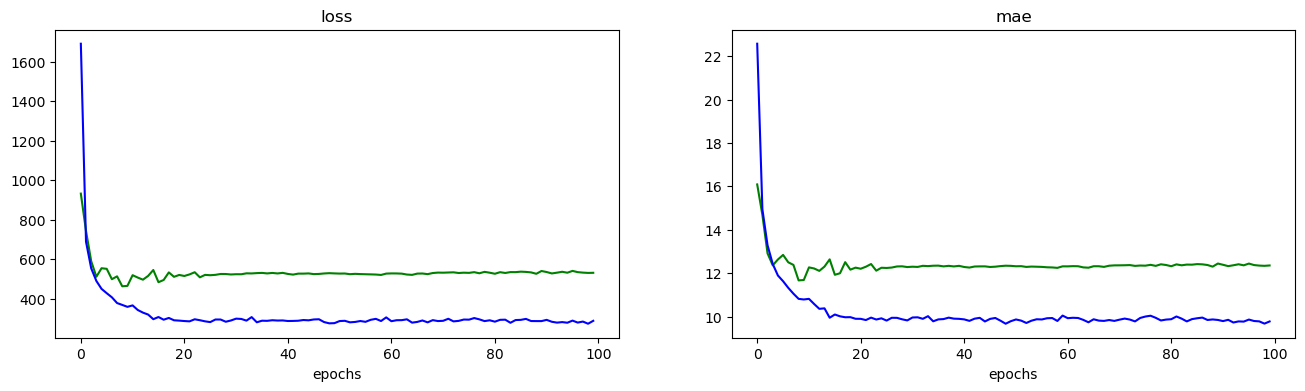

In [69]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history_c.history["val_loss"], 'g') # функция ошибки 
ax.plot(history_c.history["loss"],'b')
ax.set_title("loss")
ax.set_xlabel("epochs")
ax2 = fig.add_subplot(122)
ax2.plot(history_c.history["val_mae"], 'g') 
ax2.plot(history_c.history["mae"],'b')
ax2.set_title("mae")
ax2.set_xlabel("epochs")
print('Зеленый - валидация, синий - обучение')
plt.show()

In [71]:
model_1.load_weights("model_1_checks/w1_cp-100.ckpt")

In [72]:
preds_c = model_1.predict(X_test_c_norm)
preds_c.mean(), y_test_c.mean()

54/54 [==============================] - 0s 3ms/step


(29.779438, 37.99647680563711)

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [74]:
param_tree = { 
            "n_estimators"      : [10,25,50],
            "max_features"      : ["sqrt", "log2"],
            "bootstrap": [True, False],
            "max_depth": [5,10,20],
            'criterion': ['absolute_error', 'squared_error']
            }

In [75]:
model_rfc = GridSearchCV(RandomForestRegressor(), param_tree, n_jobs=-1, cv=5)
model_rfc.fit(X_train_c_norm, y_train_c)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['absolute_error', 'squared_error'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 25, 50]})

In [76]:
model_rfc.best_params_

{'bootstrap': True,
 'criterion': 'absolute_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 25}

In [77]:
best_rfc = model_rfc.best_estimator_

In [78]:
preds_tree_c = best_rfc.predict(X_test_c_norm)
print('########## count #########')
print('---------------tree---------------')
print('Тестовая средння абсолютная ошибка: {}'.format(mean_absolute_error(y_test_c,preds_tree_c)))
print('Тестовая среднеквадратичная ошибка: {}'.format(mean_squared_error(y_test_c,preds_tree_c)))
print('Тестовый r2: {}'.format(r2_score(y_test_c,preds_tree_c)))
print('Тестовое отношение mae к среднему: {}%'.format(round((mean_absolute_error(y_test_c,preds_tree_c)/y_test_c.mean())*100,2)))
print('Тестовая средняя цена: {}'.format(y_test_c.mean()))
print('Предсказанная средняя цена: {}'.format(preds_tree_c.mean()))
print('---------------nn---------------')
print('Тестовая средння абсолютная ошибка: {}'.format(mean_absolute_error(y_test_c,preds_c)))
print('Тестовая среднеквадратичная ошибка: {}'.format(mean_squared_error(y_test_c,preds_c)))
print('Тестовый r2: {}'.format(r2_score(y_test_c,preds_c)))
print('Тестовое отношение mae к среднему: {}%'.format(round((mean_absolute_error(y_test_c,preds_c)/y_test_c.mean())*100,2)))
print('Тестовая средняя цена: {}'.format(y_test_c.mean()))
print('Предсказанная средняя цена: {}'.format(preds_c.mean()))

########## count #########
---------------tree---------------
Тестовая средння абсолютная ошибка: 13.992472108044627
Тестовая среднеквадратичная ошибка: 744.9165404580153
Тестовый r2: 0.7274493762922394
Тестовое отношение mae к среднему: 36.83%
Тестовая средняя цена: 37.99647680563711
Предсказанная средняя цена: 31.672941867293016
---------------nn---------------
Тестовая средння абсолютная ошибка: 12.354625074183037
Тестовая среднеквадратичная ошибка: 531.7208327607027
Тестовый r2: 0.8054535820640603
Тестовое отношение mae к среднему: 32.52%
Тестовая средняя цена: 37.99647680563711
Предсказанная средняя цена: 29.779438018798828


In [79]:
model_2 = keras.models.Sequential()
model_2.add(layers.Dense(250, activation='relu', input_shape=(X_train_r_norm.shape[1],)))
model_2.add(layers.Dropout(rate=0.2))
model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dropout(rate=0.2))
model_2.add(layers.Dense(50, activation='relu'))
model_2.add(layers.Dropout(rate=0.2))
model_2.add(layers.Dense(1))

In [80]:
model_2.compile(loss='mse', optimizer='Adam', metrics=['mae'])

In [81]:
os.makedirs("model_2_checks", exist_ok=True)

In [82]:
checkpoint_path_r = "model_2_checks/w1_cp-{epoch:03d}.ckpt"
cp_callback_r = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_r, 
    verbose=1, 
    save_weights_only=True,
    save_freq=140*10)

In [83]:
history_r = model_2.fit(
    X_train_r_norm, y_train_r,
    batch_size=64,
    epochs=100,
    verbose=1,
    validation_data=(X_test_r_norm, y_test_r), callbacks=[cp_callback_r, reduce_lr])

Epoch 1/100
140/140 [==============================] - 3s 8ms/step - loss: 17252.0938 - mae: 85.3506 - val_loss: 11246.7607 - val_mae: 73.2654 - lr: 0.0010
Epoch 2/100
140/140 [==============================] - 1s 9ms/step - loss: 5796.9614 - mae: 51.2473 - val_loss: 9016.9756 - val_mae: 63.0146 - lr: 0.0010
Epoch 3/100
140/140 [==============================] - 1s 7ms/step - loss: 4440.5127 - mae: 43.2210 - val_loss: 6885.8169 - val_mae: 54.7547 - lr: 0.0010
Epoch 4/100
140/140 [==============================] - 1s 5ms/step - loss: 3558.5540 - mae: 39.0087 - val_loss: 5899.7705 - val_mae: 51.0336 - lr: 0.0010
Epoch 5/100
140/140 [==============================] - 1s 7ms/step - loss: 3105.3545 - mae: 36.3698 - val_loss: 6334.6196 - val_mae: 54.3675 - lr: 0.0010
Epoch 6/100
140/140 [==============================] - 2s 13ms/step - loss: 2825.2126 - mae: 34.5832 - val_loss: 5121.2280 - val_mae: 47.8634 - lr: 0.0010
Epoch 7/100
140/140 [==============================] - 1s 7ms/step - loss

In [84]:
score2 = model_2.evaluate(X_test_r_norm, y_test_r)

54/54 [==============================] - 0s 3ms/step - loss: 3717.0020 - mae: 41.2343


Зеленый - валидация, синий - обучение


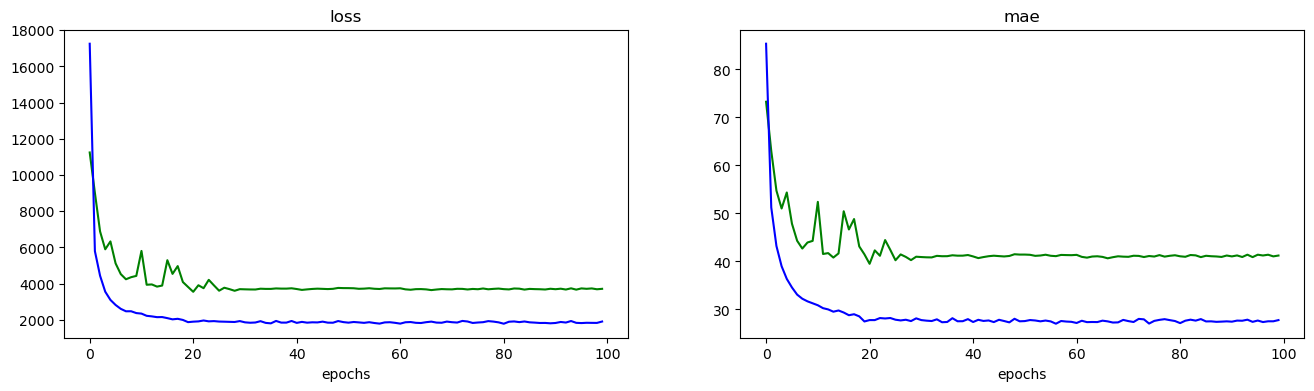

In [85]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history_r.history["val_loss"], 'g') 
ax.plot(history_r.history["loss"],'b')
ax.set_title("loss")
ax.set_xlabel("epochs")
ax2 = fig.add_subplot(122)
ax2.plot(history_r.history["val_mae"], 'g') 
ax2.plot(history_r.history["mae"],'b')
ax2.set_title("mae")
ax2.set_xlabel("epochs")
print('Зеленый - валидация, синий - обучение')
plt.show()

In [86]:
model_2.load_weights("model_2_checks/w1_cp-100.ckpt")

In [87]:
preds_r = model_2.predict(X_test_r_norm)
preds_r.mean(), y_test_r.mean()

54/54 [==============================] - 0s 3ms/step


(189.33475, 216.79213153258954)

In [88]:
model_rfr = GridSearchCV(RandomForestRegressor(), param_tree, n_jobs=-1, cv=5)
model_rfr.fit(X_train_r_norm, y_train_r)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['absolute_error', 'squared_error'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 25, 50]})

In [89]:
model_rfr.best_params_

{'bootstrap': False,
 'criterion': 'absolute_error',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 25}

In [90]:
best_rfr = model_rfr.best_estimator_

In [91]:
preds_tree_r = best_rfr.predict(X_test_r_norm)
print('########## registred #########')
print('---------------tree---------------')
print('Тестовая средння абсолютная ошибка: {}'.format(mean_absolute_error(y_test_r,preds_tree_r)))
print('Тестовая среднеквадратичная ошибка: {}'.format(mean_squared_error(y_test_r,preds_tree_r)))
print('Тестовый r2: {}'.format(r2_score(y_test_r,preds_tree_r)))
print('Тестовое отношение mae к среднему: {}%'.format(round((mean_absolute_error(y_test_r,preds_tree_r)/y_test_r.mean())*100,2)))
print('Тестовая средняя цена: {}'.format(y_test_r.mean()))
print('Предсказанная средняя цена: {}'.format(preds_tree_r.mean()))
print('---------------nn---------------')
print('Тестовая средння абсолютная ошибка: {}'.format(mean_absolute_error(y_test_r,preds_r)))
print('Тестовая среднеквадратичная ошибка: {}'.format(mean_squared_error(y_test_r,preds_r)))
print('Тестовый r2: {}'.format(r2_score(y_test_r,preds_r)))
print('Тестовое отношение mae к среднему: {}%'.format(round((mean_absolute_error(y_test_r,preds_r)/y_test_r.mean())*100,2)))
print('Тестовая средняя цена: {}'.format(y_test_r.mean()))
print('Предсказанная средняя цена: {}'.format(preds_r.mean()))

########## registred #########
---------------tree---------------
Тестовая средння абсолютная ошибка: 53.268561362301824
Тестовая среднеквадратичная ошибка: 5898.503880681151
Тестовый r2: 0.8300658072956195
Тестовое отношение mae к среднему: 24.57%
Тестовая средняя цена: 216.79213153258954
Предсказанная средняя цена: 192.99483264826776
---------------nn---------------
Тестовая средння абсолютная ошибка: 41.23433215395535
Тестовая среднеквадратичная ошибка: 3717.002272891501
Тестовый r2: 0.8929142383727273
Тестовое отношение mae к среднему: 19.02%
Тестовая средняя цена: 216.79213153258954
Предсказанная средняя цена: 189.33474731445312


In [92]:
print('########## total #########')
print('---------------tree---------------')
print('Тестовая средння абсолютная ошибка: {}'.format(mean_absolute_error(t_test_t,preds_tree_r+preds_tree_c)))
print('Тестовая среднеквадратичная ошибка: {}'.format(mean_squared_error(t_test_t,preds_tree_r+preds_tree_c)))
print('Тестовый r2: {}'.format(r2_score(t_test_t,preds_tree_r+preds_tree_c)))
print('Тестовое отношение mae к среднему: {}%'.format(round((mean_absolute_error(t_test_t,preds_tree_r+preds_tree_c)/t_test_t.mean())*100,2)))
print('Тестовая средняя цена: {}'.format(t_test_t.mean()))
print('Предсказанная средняя цена: {}'.format((preds_tree_r+preds_tree_r).mean()))
print('---------------nn---------------')
print('Тестовая средння абсолютная ошибка: {}'.format(mean_absolute_error(t_test_t,preds_r+preds_c)))
print('Тестовая среднеквадратичная ошибка: {}'.format(mean_squared_error(t_test_t,preds_r+preds_c)))
print('Тестовый r2: {}'.format(r2_score(t_test_t,preds_r+preds_c)))
print('Тестовое отношение mae к среднему: {}%'.format(round((mean_absolute_error(t_test_t,preds_r+preds_c)/t_test_t.mean())*100,2)))
print('Тестовая средняя цена: {}'.format(t_test_t.mean()))
print('Предсказанная средняя цена: {}'.format((preds_r+preds_c).mean()))

########## total #########
---------------tree---------------
Тестовая средння абсолютная ошибка: 62.63923664122137
Тестовая среднеквадратичная ошибка: 8542.25723711098
Тестовый r2: 0.8156951695936192
Тестовое отношение mae к среднему: 24.58%
Тестовая средняя цена: 254.78860833822665
Предсказанная средняя цена: 385.9896652965355
---------------nn---------------
Тестовая средння абсолютная ошибка: 49.86223832313551
Тестовая среднеквадратичная ошибка: 5561.87994213721
Тестовый r2: 0.8799987742088957
Тестовое отношение mae к среднему: 19.57%
Тестовая средняя цена: 254.78860833822665
Предсказанная средняя цена: 219.11416625976562


In [93]:
preds_t = preds_r+preds_c
preds_t = np.reshape(preds_t,1703)
preds_t.shape

(1703,)

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

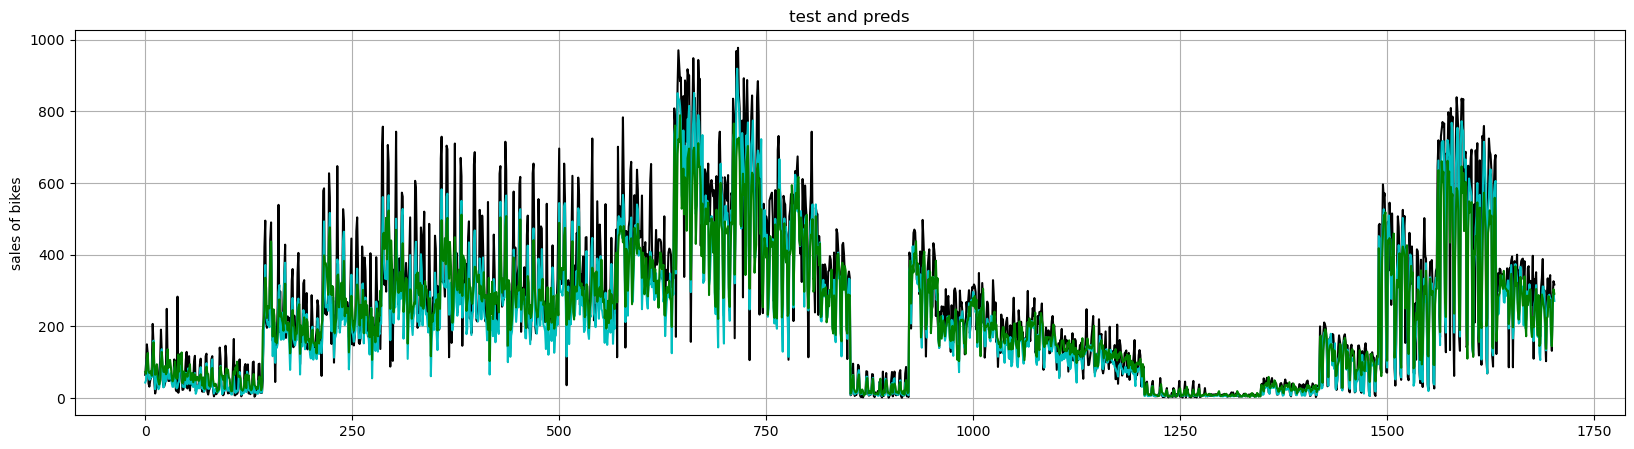

In [96]:
fig = plt.figure(figsize=(20,5))
sns.lineplot(x = np.arange(0,len(t_test_t)),y =t_test_t,color= 'k') 
sns.lineplot(x = np.arange(0,len(t_test_t)),y =preds_t,color= 'c') 
sns.lineplot(x = np.arange(0,len(t_test_t)),y =(preds_tree_r+preds_tree_c),color= 'g') 
plt.grid()
plt.title('test and preds')
plt.ylabel('sales of bikes')
plt.show()

сомнительно, но окей

обе модели переобучаются + я начинаю сомневатся в необходимсти такого большого количнства дамми пермеенных, поэтому увеличу дропаут и добавлю на первый слой l1 регуляризацию, чтобы занулить некоторые из весов

In [219]:
reg1 = tf.keras.regularizers.L1L2(l1=0.005, l2=0.00) 
reg2 = tf.keras.regularizers.L1L2(l1=0.00, l2=0.0015)

In [220]:
model_3 = keras.models.Sequential()
model_3.add(layers.Dense(1000, activation='relu', input_shape=(X_train_c_norm.shape[1],),kernel_regularizer = reg1))
model_3.add(layers.Dropout(rate=0.3))
model_3.add(layers.Dense(500, activation='relu',kernel_regularizer = reg2))
model_3.add(layers.Dropout(rate=0.3))
model_3.add(layers.Dense(500, activation='relu',kernel_regularizer = reg2))
model_3.add(layers.Dropout(rate=0.3))
model_3.add(layers.Dense(1,kernel_regularizer = reg2))

In [221]:
model_3.compile(loss='mse', optimizer='Adam', metrics=['mae'])

In [222]:
os.makedirs("model_3_checks", exist_ok=True)

In [223]:
checkpoint_path_с_1 = "model_3_checks/w1_cp-{epoch:03d}.ckpt"
cp_callback_с_1 = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_с_1, 
    verbose=1, 
    save_weights_only=True,
    save_freq=140*5)

In [224]:
history_c_1 = model_3.fit(
    X_train_c_norm, y_train_c,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(X_test_c_norm, y_test_c), callbacks=[cp_callback_с_1, reduce_lr])

Epoch 1/20
140/140 [==============================] - 4s 17ms/step - loss: 954.2301 - mae: 17.1083 - val_loss: 865.2073 - val_mae: 15.6285 - lr: 0.0010
Epoch 2/20
140/140 [==============================] - 2s 17ms/step - loss: 460.3676 - mae: 12.2098 - val_loss: 640.6381 - val_mae: 13.8024 - lr: 0.0010
Epoch 3/20
140/140 [==============================] - 2s 14ms/step - loss: 387.4038 - mae: 11.1644 - val_loss: 552.6623 - val_mae: 13.1324 - lr: 0.0010
Epoch 4/20
140/140 [==============================] - 2s 13ms/step - loss: 338.5559 - mae: 10.4015 - val_loss: 507.9052 - val_mae: 12.1327 - lr: 0.0010
Epoch 5/20
139/140 [============================>.] - ETA: 0s - loss: 318.2392 - mae: 10.0887
Epoch 5: saving model to model_3_checks\w1_cp-005.ckpt
140/140 [==============================] - 2s 15ms/step - loss: 318.3933 - mae: 10.0951 - val_loss: 662.7823 - val_mae: 13.7022 - lr: 0.0010
Epoch 6/20
140/140 [==============================] - 2s 16ms/step - loss: 283.6252 - mae: 9.8151 - va

In [225]:
score3 = model_3.evaluate(X_test_c_norm, y_test_c)

54/54 [==============================] - 0s 4ms/step - loss: 514.8099 - mae: 11.8720


Зеленый - валидация, синий - обучение


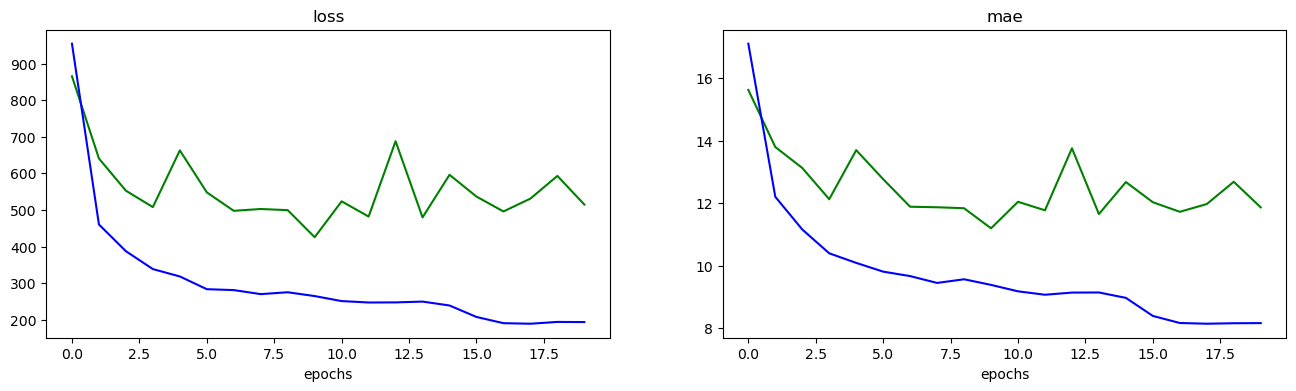

In [226]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history_c_1.history["val_loss"], 'g') # функция ошибки 
ax.plot(history_c_1.history["loss"],'b')
ax.set_title("loss")
ax.set_xlabel("epochs")
ax2 = fig.add_subplot(122)
ax2.plot(history_c_1.history["val_mae"], 'g') 
ax2.plot(history_c_1.history["mae"],'b')
ax2.set_title("mae")
ax2.set_xlabel("epochs")
print('Зеленый - валидация, синий - обучение')
plt.show()

In [232]:
model_3.load_weights("model_3_checks/w1_cp-010.ckpt")

In [233]:
preds_с_1 = model_3.predict(X_test_c_norm)
preds_с_1.mean(), y_test_c.mean()

54/54 [==============================] - 0s 4ms/step


(34.56126, 37.99647680563711)

In [234]:
preds_tree_c = best_rfc.predict(X_test_c_norm)
print('########## count #########')
print('---------------tree---------------')
print('Тестовая средння абсолютная ошибка: {}'.format(mean_absolute_error(y_test_c,preds_tree_c)))
print('Тестовая среднеквадратичная ошибка: {}'.format(mean_squared_error(y_test_c,preds_tree_c)))
print('Тестовый r2: {}'.format(r2_score(y_test_c,preds_tree_c)))
print('Тестовое отношение mae к среднему: {}%'.format(round((mean_absolute_error(y_test_c,preds_tree_c)/y_test_c.mean())*100,2)))
print('Тестовая средняя цена: {}'.format(y_test_c.mean()))
print('Предсказанная средняя цена: {}'.format(preds_tree_c.mean()))
print('---------------nn---------------')
print('Тестовая средння абсолютная ошибка: {}'.format(mean_absolute_error(y_test_c,preds_c)))
print('Тестовая среднеквадратичная ошибка: {}'.format(mean_squared_error(y_test_c,preds_c)))
print('Тестовый r2: {}'.format(r2_score(y_test_c,preds_c)))
print('Тестовое отношение mae к среднему: {}%'.format(round((mean_absolute_error(y_test_c,preds_c)/y_test_c.mean())*100,2)))
print('Тестовая средняя цена: {}'.format(y_test_c.mean()))
print('Предсказанная средняя цена: {}'.format(preds_c.mean()))
print('---------------nn_v2-------------')
print('Тестовая средння абсолютная ошибка: {}'.format(mean_absolute_error(y_test_c,preds_с_1)))
print('Тестовая среднеквадратичная ошибка: {}'.format(mean_squared_error(y_test_c,preds_с_1)))
print('Тестовый r2: {}'.format(r2_score(y_test_c,preds_с_1 )))
print('Тестовое отношение mae к среднему: {}%'.format(round((mean_absolute_error(y_test_c,preds_с_1 )/y_test_c.mean())*100,2)))
print('Тестовая средняя цена: {}'.format(y_test_c.mean()))
print('Предсказанная средняя цена: {}'.format(preds_с_1.mean()))


########## count #########
---------------tree---------------
Тестовая средння абсолютная ошибка: 13.992472108044627
Тестовая среднеквадратичная ошибка: 744.9165404580153
Тестовый r2: 0.7274493762922394
Тестовое отношение mae к среднему: 36.83%
Тестовая средняя цена: 37.99647680563711
Предсказанная средняя цена: 31.672941867293016
---------------nn---------------
Тестовая средння абсолютная ошибка: 12.354625074183037
Тестовая среднеквадратичная ошибка: 531.7208327607027
Тестовый r2: 0.8054535820640603
Тестовое отношение mae к среднему: 32.52%
Тестовая средняя цена: 37.99647680563711
Предсказанная средняя цена: 29.779438018798828
---------------nn_v2-------------
Тестовая средння абсолютная ошибка: 11.201154969960749
Тестовая среднеквадратичная ошибка: 412.94534579383037
Тестовый r2: 0.848911246508066
Тестовое отношение mae к среднему: 29.48%
Тестовая средняя цена: 37.99647680563711
Предсказанная средняя цена: 34.56126022338867


In [235]:
model_4 = keras.models.Sequential()
model_4.add(layers.Dense(1000, activation='relu', input_shape=(X_train_c_norm.shape[1],),kernel_regularizer = reg1))
model_4.add(layers.Dropout(rate=0.3))
model_4.add(layers.Dense(500, activation='relu',kernel_regularizer = reg2))
model_4.add(layers.Dropout(rate=0.3))
model_4.add(layers.Dense(500, activation='relu',kernel_regularizer = reg2))
model_4.add(layers.Dropout(rate=0.3))
model_4.add(layers.Dense(1,kernel_regularizer = reg2))

In [236]:
model_4.compile(loss='mse', optimizer='Adam', metrics=['mae'])

In [237]:
os.makedirs("model_4_checks", exist_ok=True)

In [238]:
checkpoint_path_r_1 = "model_4_checks/w1_cp-{epoch:03d}.ckpt"
cp_callback_r_1 = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_r_1, 
    verbose=1, 
    save_weights_only=True,
    save_freq=140*5)

In [239]:
history_r_1 = model_4.fit(
    X_train_r_norm, y_train_r,
    batch_size=64,
    epochs=25,
    verbose=1,
    validation_data=(X_test_r_norm, y_test_r), callbacks=[cp_callback_r_1, reduce_lr])

Epoch 1/25
140/140 [==============================] - 3s 15ms/step - loss: 8784.4307 - mae: 60.3622 - val_loss: 7168.6147 - val_mae: 55.5299 - lr: 0.0010
Epoch 2/25
140/140 [==============================] - 2s 15ms/step - loss: 2953.3435 - mae: 35.3112 - val_loss: 5134.9741 - val_mae: 48.3235 - lr: 0.0010
Epoch 3/25
140/140 [==============================] - 2s 15ms/step - loss: 2240.2158 - mae: 30.5259 - val_loss: 3707.0388 - val_mae: 39.9519 - lr: 0.0010
Epoch 4/25
140/140 [==============================] - 2s 13ms/step - loss: 1947.1099 - mae: 28.5285 - val_loss: 4024.2620 - val_mae: 42.5895 - lr: 0.0010
Epoch 5/25
138/140 [============================>.] - ETA: 0s - loss: 1876.4386 - mae: 27.8489
Epoch 5: saving model to model_4_checks\w1_cp-005.ckpt
140/140 [==============================] - 2s 14ms/step - loss: 1879.2233 - mae: 27.8805 - val_loss: 5160.2930 - val_mae: 50.5008 - lr: 0.0010
Epoch 6/25
140/140 [==============================] - 2s 16ms/step - loss: 1767.5319 - mae:

In [240]:
score4 = model_4.evaluate(X_test_r_norm, y_test_r)

54/54 [==============================] - 0s 5ms/step - loss: 3824.6401 - mae: 42.8885


Зеленый - валидация, синий - обучение


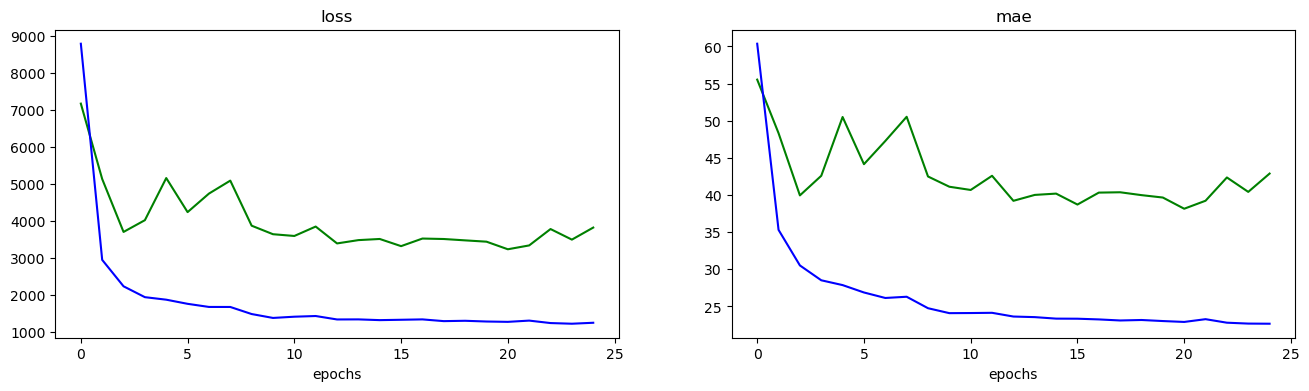

In [241]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history_r_1.history["val_loss"], 'g') 
ax.plot(history_r_1.history["loss"],'b')
ax.set_title("loss")
ax.set_xlabel("epochs")
ax2 = fig.add_subplot(122)
ax2.plot(history_r_1.history["val_mae"], 'g') 
ax2.plot(history_r_1.history["mae"],'b')
ax2.set_title("mae")
ax2.set_xlabel("epochs")
print('Зеленый - валидация, синий - обучение')
plt.show()

In [243]:
model_4.load_weights("model_4_checks/w1_cp-020.ckpt")

In [244]:
preds_r_1 = model_4.predict(X_test_r_norm)
preds_r_1.mean(), y_test_r.mean()

54/54 [==============================] - 0s 4ms/step


(190.509, 216.79213153258954)

In [245]:
print('########## registred #########')
print('---------------tree---------------')
print('Тестовая средння абсолютная ошибка: {}'.format(mean_absolute_error(y_test_r,preds_tree_r)))
print('Тестовая среднеквадратичная ошибка: {}'.format(mean_squared_error(y_test_r,preds_tree_r)))
print('Тестовый r2: {}'.format(r2_score(y_test_r,preds_tree_r)))
print('Тестовое отношение mae к среднему: {}%'.format(round((mean_absolute_error(y_test_r,preds_tree_r)/y_test_r.mean())*100,2)))
print('Тестовая средняя цена: {}'.format(y_test_r.mean()))
print('Предсказанная средняя цена: {}'.format(preds_tree_r.mean()))
print('---------------nn---------------')
print('Тестовая средння абсолютная ошибка: {}'.format(mean_absolute_error(y_test_r,preds_r)))
print('Тестовая среднеквадратичная ошибка: {}'.format(mean_squared_error(y_test_r,preds_r)))
print('Тестовый r2: {}'.format(r2_score(y_test_r,preds_r)))
print('Тестовое отношение mae к среднему: {}%'.format(round((mean_absolute_error(y_test_r,preds_r)/y_test_r.mean())*100,2)))
print('Тестовая средняя цена: {}'.format(y_test_r.mean()))
print('Предсказанная средняя цена: {}'.format(preds_r.mean()))
print('---------------nn_v2--------------')
print('Тестовая средння абсолютная ошибка: {}'.format(mean_absolute_error(y_test_r,preds_r_1)))
print('Тестовая среднеквадратичная ошибка: {}'.format(mean_squared_error(y_test_r,preds_r_1)))
print('Тестовый r2: {}'.format(r2_score(y_test_r,preds_r_1)))
print('Тестовое отношение mae к среднему: {}%'.format(round((mean_absolute_error(y_test_r,preds_r_1)/y_test_r.mean())*100,2)))
print('Тестовая средняя цена: {}'.format(y_test_r.mean()))
print('Предсказанная средняя цена: {}'.format(preds_r_1.mean()))

########## registred #########
---------------tree---------------
Тестовая средння абсолютная ошибка: 53.268561362301824
Тестовая среднеквадратичная ошибка: 5898.503880681151
Тестовый r2: 0.8300658072956195
Тестовое отношение mae к среднему: 24.57%
Тестовая средняя цена: 216.79213153258954
Предсказанная средняя цена: 192.99483264826776
---------------nn---------------
Тестовая средння абсолютная ошибка: 41.23433215395535
Тестовая среднеквадратичная ошибка: 3717.002272891501
Тестовый r2: 0.8929142383727273
Тестовое отношение mae к среднему: 19.02%
Тестовая средняя цена: 216.79213153258954
Предсказанная средняя цена: 189.33474731445312
---------------nn_v2--------------
Тестовая средння абсолютная ошибка: 39.66327856683199
Тестовая среднеквадратичная ошибка: 3429.8657697837816
Тестовый r2: 0.9011865580725381
Тестовое отношение mae к среднему: 18.3%
Тестовая средняя цена: 216.79213153258954
Предсказанная средняя цена: 190.50900268554688


In [246]:
preds_t_1 = preds_r_1+preds_с_1
preds_t_1 = np.reshape(preds_t_1,1703)
preds_t_1.shape

(1703,)

In [247]:
print('########## total #########')
print('---------------tree---------------')
print('Тестовая средння абсолютная ошибка: {}'.format(mean_absolute_error(t_test_t,preds_tree_r+preds_tree_c)))
print('Тестовая среднеквадратичная ошибка: {}'.format(mean_squared_error(t_test_t,preds_tree_r+preds_tree_c)))
print('Тестовый r2: {}'.format(r2_score(t_test_t,preds_tree_r+preds_tree_c)))
print('Тестовое отношение mae к среднему: {}%'.format(round((mean_absolute_error(t_test_t,preds_tree_r+preds_tree_c)/t_test_t.mean())*100,2)))
print('Тестовая средняя цена: {}'.format(t_test_t.mean()))
print('Предсказанная средняя цена: {}'.format((preds_tree_r+preds_tree_r).mean()))
print('---------------nn---------------')
print('Тестовая средння абсолютная ошибка: {}'.format(mean_absolute_error(t_test_t,preds_r+preds_c)))
print('Тестовая среднеквадратичная ошибка: {}'.format(mean_squared_error(t_test_t,preds_r+preds_c)))
print('Тестовый r2: {}'.format(r2_score(t_test_t,preds_r+preds_c)))
print('Тестовое отношение mae к среднему: {}%'.format(round((mean_absolute_error(t_test_t,preds_r+preds_c)/t_test_t.mean())*100,2)))
print('Тестовая средняя цена: {}'.format(t_test_t.mean()))
print('Предсказанная средняя цена: {}'.format((preds_r+preds_c).mean()))
print('---------------nn_v2-------------')
print('Тестовая средння абсолютная ошибка: {}'.format(mean_absolute_error(t_test_t,preds_t_1)))
print('Тестовая среднеквадратичная ошибка: {}'.format(mean_squared_error(t_test_t,preds_t_1)))
print('Тестовый r2: {}'.format(r2_score(t_test_t,preds_t_1)))
print('Тестовое отношение mae к среднему: {}%'.format(round((mean_absolute_error(t_test_t,preds_t_1)/t_test_t.mean())*100,2)))
print('Тестовая средняя цена: {}'.format(t_test_t.mean()))
print('Предсказанная средняя цена: {}'.format((preds_t_1).mean()))

########## total #########
---------------tree---------------
Тестовая средння абсолютная ошибка: 62.63923664122137
Тестовая среднеквадратичная ошибка: 8542.25723711098
Тестовый r2: 0.8156951695936192
Тестовое отношение mae к среднему: 24.58%
Тестовая средняя цена: 254.78860833822665
Предсказанная средняя цена: 385.9896652965355
---------------nn---------------
Тестовая средння абсолютная ошибка: 49.86223832313551
Тестовая среднеквадратичная ошибка: 5561.87994213721
Тестовый r2: 0.8799987742088957
Тестовое отношение mae к среднему: 19.57%
Тестовая средняя цена: 254.78860833822665
Предсказанная средняя цена: 219.11416625976562
---------------nn_v2-------------
Тестовая средння абсолютная ошибка: 45.8478028022466
Тестовая среднеквадратичная ошибка: 4743.80656935355
Тестовый r2: 0.8976492464489311
Тестовое отношение mae к среднему: 17.99%
Тестовая средняя цена: 254.78860833822665
Предсказанная средняя цена: 225.07028198242188


c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

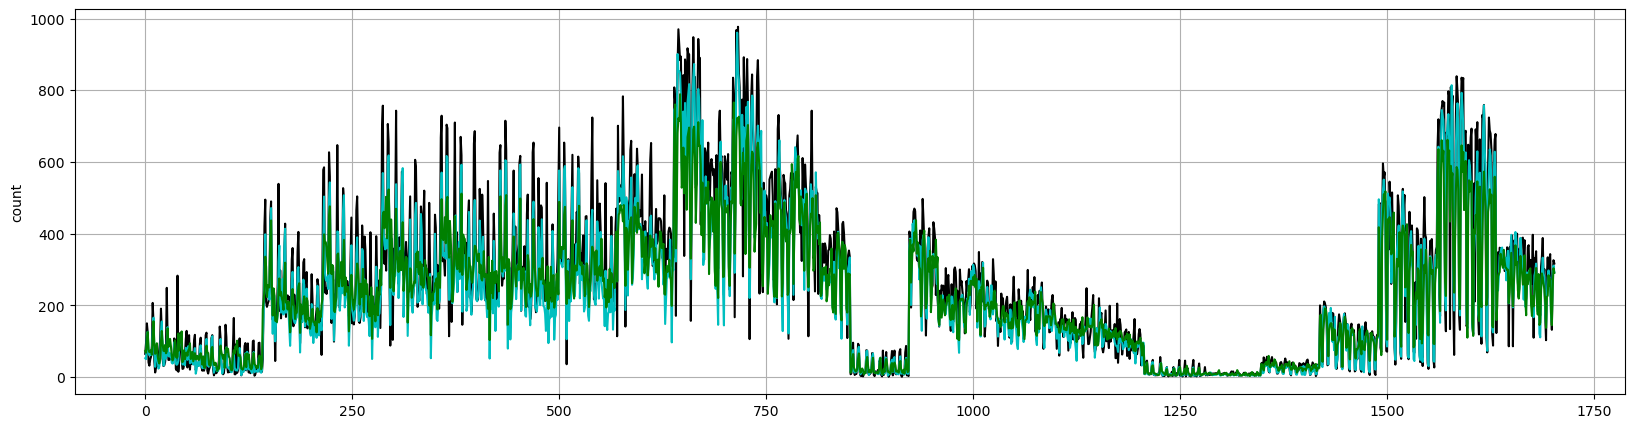

In [248]:
fig = plt.figure(figsize=(20,5))
sns.lineplot(x = np.arange(0,len(t_test_t)),y =t_test_t,color= 'k') 
sns.lineplot(x = np.arange(0,len(t_test_t)),y =preds_t_1,color= 'c') #nn
sns.lineplot(x = np.arange(0,len(t_test_t)),y =(preds_tree_r+preds_tree_c),color= 'g') #randomforest
plt.grid()
plt.show()

ну стало получше